In [1]:
%matplotlib inline
import pymc3 as pm
import seaborn as sb
from theano import config
config.warn.round=False

n = 1000
obs_v1 = 680
obs_v2 = 700

with pm.Model() as model: # context management
    # define priors
    prior_v1 = pm.Beta('prior_v1', alpha=2, beta=2)
    prior_v2 = pm.Beta('prior_v2', alpha=2, beta=2)

    # define likelihood
    like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
    like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)
    
    # define metrics
    pm.Deterministic('difference', prior_v2 - prior_v1)
    pm.Deterministic('relation', (prior_v2/prior_v1) - 1)

    # inference
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

Optimization terminated successfully.
         Current function value: 9.788161
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10


100%|██████████| 50000/50000 [00:15<00:00, 3242.32it/s]


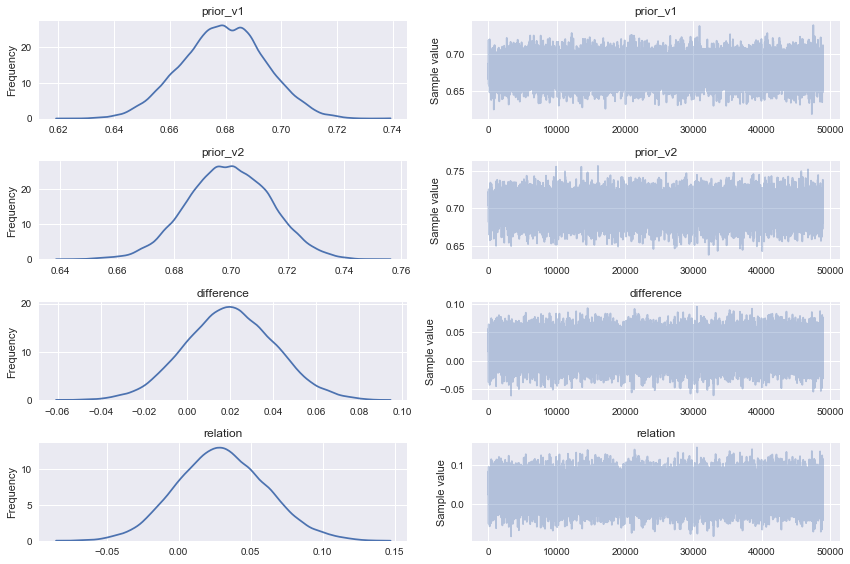

In [2]:
_ = pm.traceplot(trace[1000:], grid=True)

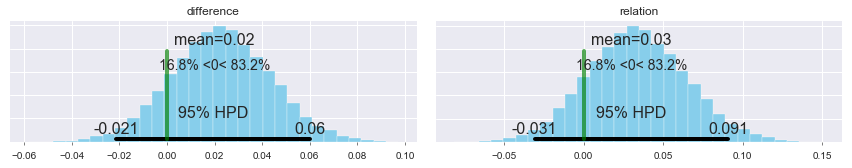

In [3]:
_ = pm.plot_posterior(trace[1000:], varnames=['difference', 'relation'], 
                      ref_val=0, color='#87ceeb')